In [1]:
import os
os.chdir('../..')

In [2]:
import comet_ml
from comet_ml.query import Parameter
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from mutil.cometml.apiquery import exp_metrics2list, exp_params2list

In [3]:
comet_api = comet_ml.api.API()

In [19]:
def get_exps(s_opt, strat, c_opt):
    query = (Parameter('CLIENT_FRACTION') == 1) & (Parameter('SERVER_OPT') == s_opt) & (Parameter('CLIENT_OPT') == c_opt) & (Parameter('CLIENT_OPT_STRATEGY') == strat)
    return comet_api.query('federated-learning', '10c2-compare', query)

In [22]:
opts = [("SGD", "nothing", "SGD"),
        ("Yogi", "nothing", "SGD"),
        ("Yogi", "avg", "Yogi"),
        ("Yogi", "nothing", "Yogi"),
        ("Yogi", "reinit", "Yogi")]
res = {}
for s_opt, strat, c_opt in opts:
    exps = get_exps(s_opt, strat, c_opt)
    res[(s_opt, strat, c_opt)] = exp_metrics2list(exps, "test_acc", float)

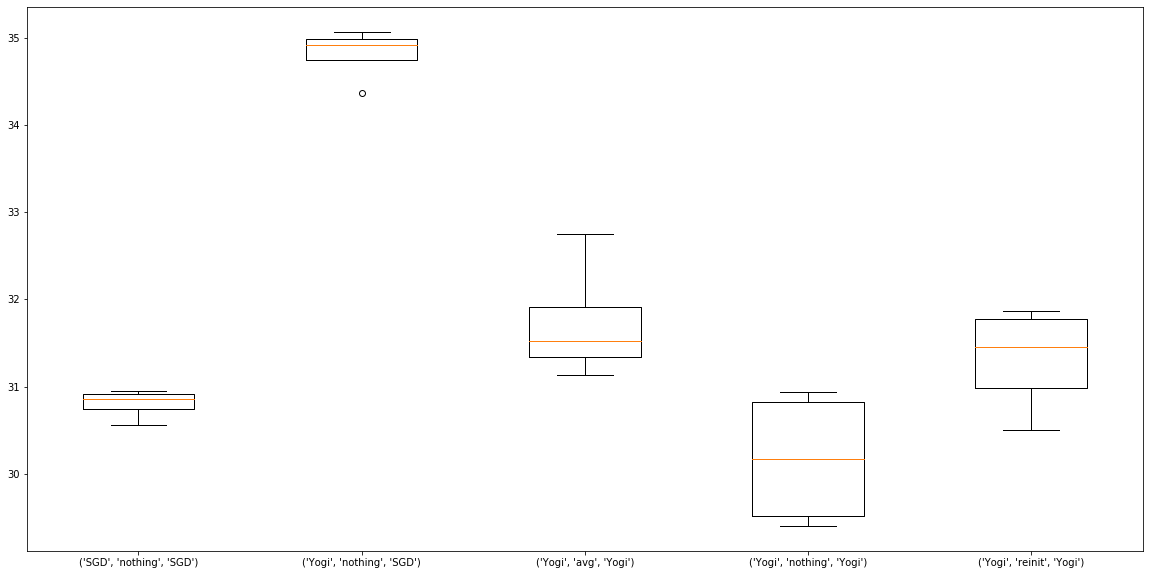

In [31]:
plt.figure(figsize=(20,10))
plt.boxplot(res.values(), labels=res.keys())
plt.show()

In [9]:
def get_df(exps):
#     s_opt = exp_params2list(exps, "SERVER_OPT", str)
#     c_opt = exp_params2list(exps, "CLIENT_OPT_STRATEGY", str)
#     strat = exp_params2list(exps, "CLIENT_OPT", str)
    teas = exp_metrics2list(exps, "test_acc", float)
#     return pd.DataFrame({"acc": teas, "s_opt": s_opt, "strat": strat, "c_opt": c_opt})
    return pd.DataFrame({"acc": teas, "s_opt": s_opt, "strat": strat, "c_opt": c_opt})

In [10]:
df = get_df(exps)

In [12]:
go = df.groupby(["s_opt", "strat", "c_opt"])

In [14]:
go.std()

acc
s_opt strat c_opt            
SGD   SGD   nothing  0.175190
Yogi  SGD   nothing  0.309341
      Yogi  avg      0.710117
            nothing  0.804627
            reinit   0.629464